In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### Importing our data from kaggle 
Let's start by reading in titanic_train.csv file into a pandas dataframe

In [144]:
train = pd.read_csv('train.csv')
train.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

<img src="variables.png">


### Data Preprocessing 
Finding the null values via seaborn heatmap function for data visualitation

<AxesSubplot:>

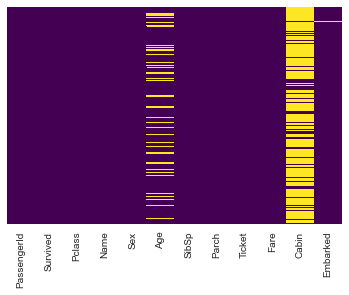

In [145]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis',) #yticklabels flase is for not showing each values on y axis from 0-890

Roughly 20 percent of the Age data is missing. The proportion is small enough for some manipulation but cabin is missing in majority which can cause problems in basic computation, either we should drop it or do something of it to use it in further computation.

<AxesSubplot:xlabel='Survived', ylabel='count'>

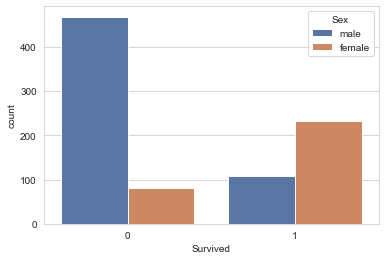

In [146]:
sns.set_style('whitegrid')
sns.countplot( x="Survived", data=train, hue="Sex", palette= "deep")

Here are survived stats of male and female w.r.t  0 represents not survived and 1 survived, on y axis there is the count 

<AxesSubplot:xlabel='Survived', ylabel='count'>

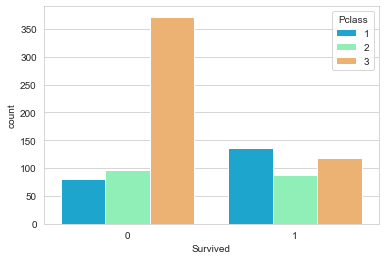

In [147]:
sns.set_style('whitegrid')
sns.countplot( x='Survived',  hue="Pclass", palette="rainbow", data =train)

Here are survived stats of male and female survived w.r.t to the Pclass or vice versa 

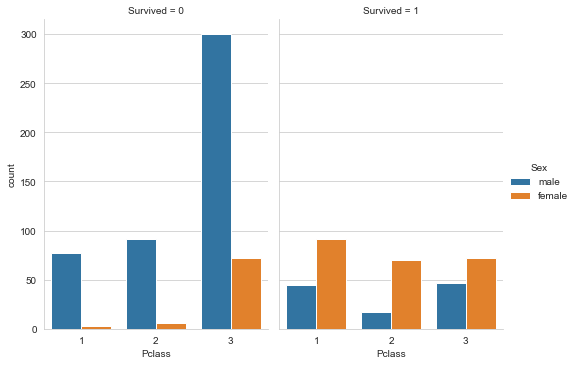

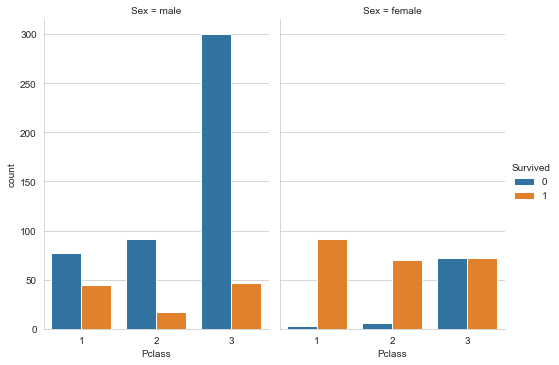

In [148]:
 #1
 sns.catplot(x='Pclass', hue='Sex', col='Survived', data=train, kind="count", height =5, aspect=0.7)
 #2
 sns.catplot(x='Pclass', hue='Survived', col='Sex', data=train, kind="count", height =5, aspect=0.7)
  

Using catplot to display more categorical data like here 3 features were used and the extraction from #1 was 
Males from Pclass 3 were among the most non survived ones, where as there were more females from Pclass 1 who survived.
Using #2 we found out that females survived and not survived from Pclass 3 were almost equal

<AxesSubplot:xlabel='Age'>

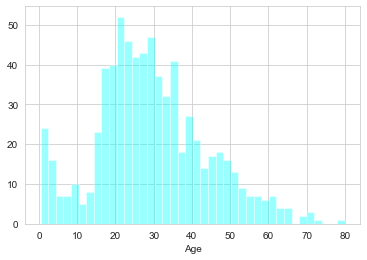

In [149]:
sns.distplot(train['Age'].dropna(),kde=False,color='Cyan',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

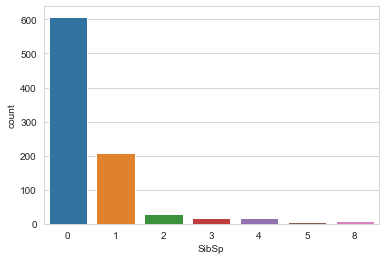

In [150]:
sns.countplot(x='SibSp', data=train)
#mostly people were btw 18-35 age 

## DATA CLEANING

As we know from our data analysis that Age and Cabin columns contains null values and cabin contains the most number of null values.

Run this code to see the plot.

sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis',)

So we need to clean the data( maybe addd some using statistics) or if required drop some columns too. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

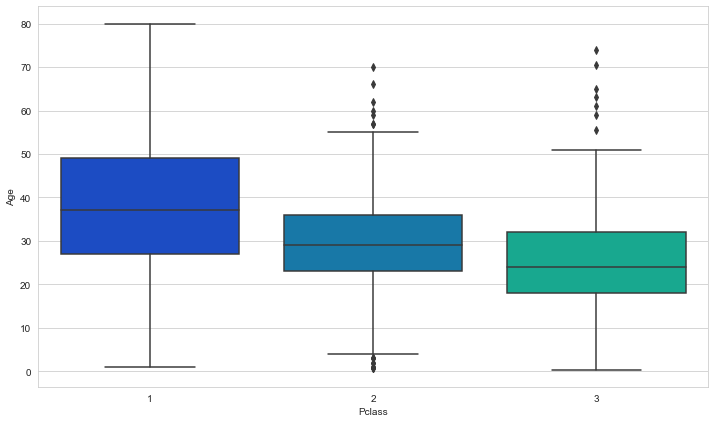

In [151]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data =train, palette='winter')

Results : Wealthier passengers in the higher classes tend to be older which makes sense. We can now use average values of ages in each classes to fullfill the null values of age column. 

In [152]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29 
        else: 
            return 24
    else :
        return Age    

In [153]:
train['Age'] = train[['Age', "Pclass"]].apply(impute_age, axis = 1)

<AxesSubplot:>

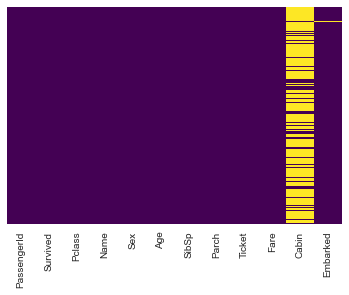

In [154]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Age column is full filled pretty well using simple code now we need to crop cabin column because of the amount of null values it has.

In [155]:
train.drop("Cabin", axis=1, inplace=True) #inplace doesn't show it right after execution

In [156]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [157]:
train.isnull().sum()
train[train.Embarked.isnull()] #best method to find where and how many nulls are there in a column

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN

In [158]:
train.shape #before droping these two values 

(891, 11)

In [159]:
train.dropna(inplace=True) #if we didn't use inplace parametre our values will be dropped temporarily and will not be visible in dataset but setting inplace true it replaces them 
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now dropping the useless values like Passenger Id, Name, Embarked but before doing that we need to convert some data first like Sex 

In [160]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [161]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [162]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [163]:
train = pd.concat([train,sex,embark],axis=1)

In [164]:
train.head(10)

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1
5            6         0       3  24.0      0      0   8.4583     1  1  0
6            7         0       1  54.0      0      0  51.8625     1  0  1
7            8         0       3   2.0      3      1  21.0750     1  0  1
8            9         1       3  27.0      0      2  11.1333     0  0  1
9           10         1       2  14.0      1      0  30.0708     0  0  0

here's a important thing to notice : Embarked contained 3 values which were S,C,Q 

so where Q is 1 the value is Q 

where S is 1 the value is S

where both are zero the value is C

but sex contained only two values : either male or female so if Male is 1 then the value is M, if male is 0 then its female 

## Buidling a Logistic Regression Model

### Train Test Split

In [165]:
train.drop('Survived',axis=1)

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1       3  22.0      1      0   7.2500     1  0  1
1              2       1  38.0      1      0  71.2833     0  0  0
2              3       3  26.0      0      0   7.9250     0  0  1
3              4       1  35.0      1      0  53.1000     0  0  1
4              5       3  35.0      0      0   8.0500     1  0  1
..           ...     ...   ...    ...    ...      ...   ... .. ..
886          887       2  27.0      0      0  13.0000     1  0  1
887          888       1  19.0      0      0  30.0000     0  0  1
888          889       3  24.0      1      2  23.4500     0  0  1
889          890       1  26.0      0      0  30.0000     1  0  0
890          891       3  32.0      0      0   7.7500     1  1  0

[889 rows x 9 columns]

In [166]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test, = train_test_split(train.drop('Survived',axis=1),
                                    train['Survived'], test_size = 0.30,
                                    random_state = 101)

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [172]:
pred = model.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8014981273408239


In [177]:
from sklearn.metrics import confusion_matrix

In [181]:
accuracy=confusion_matrix(y_test,pred)
accuracy

array([[148,  15],
       [ 38,  66]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

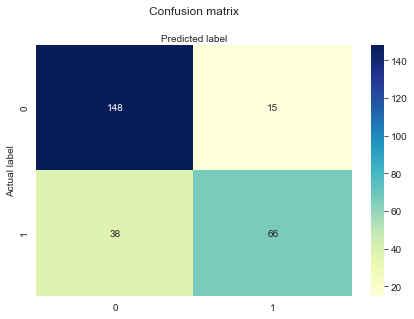

In [183]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(accuracy), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)